<style type="text/css">
.time_spent {
    width: 3em;
    border-style: none;
    background-color: silver;
    font-weight: bold;
    padding-left: 5px;
}
</style>

# [WS13/14] Mathematics for Robotics and Control Assignment 005 - SVD decomposition and Jacobians

In [13]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
    
except NameError:
    pass

import numpy
import matplotlib
import scipy.linalg 
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot
            
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython
from pylab import *
from numpy import *

---

### SVD decomposition

Consider the following scenario description: the robot (the blue sphere in the picture below) moves in a rectangular arena surrounded by four pillars at every corner. On top of each of the pillars, a spherical object is mounted that sends some form of signal that the robot is able to receive.

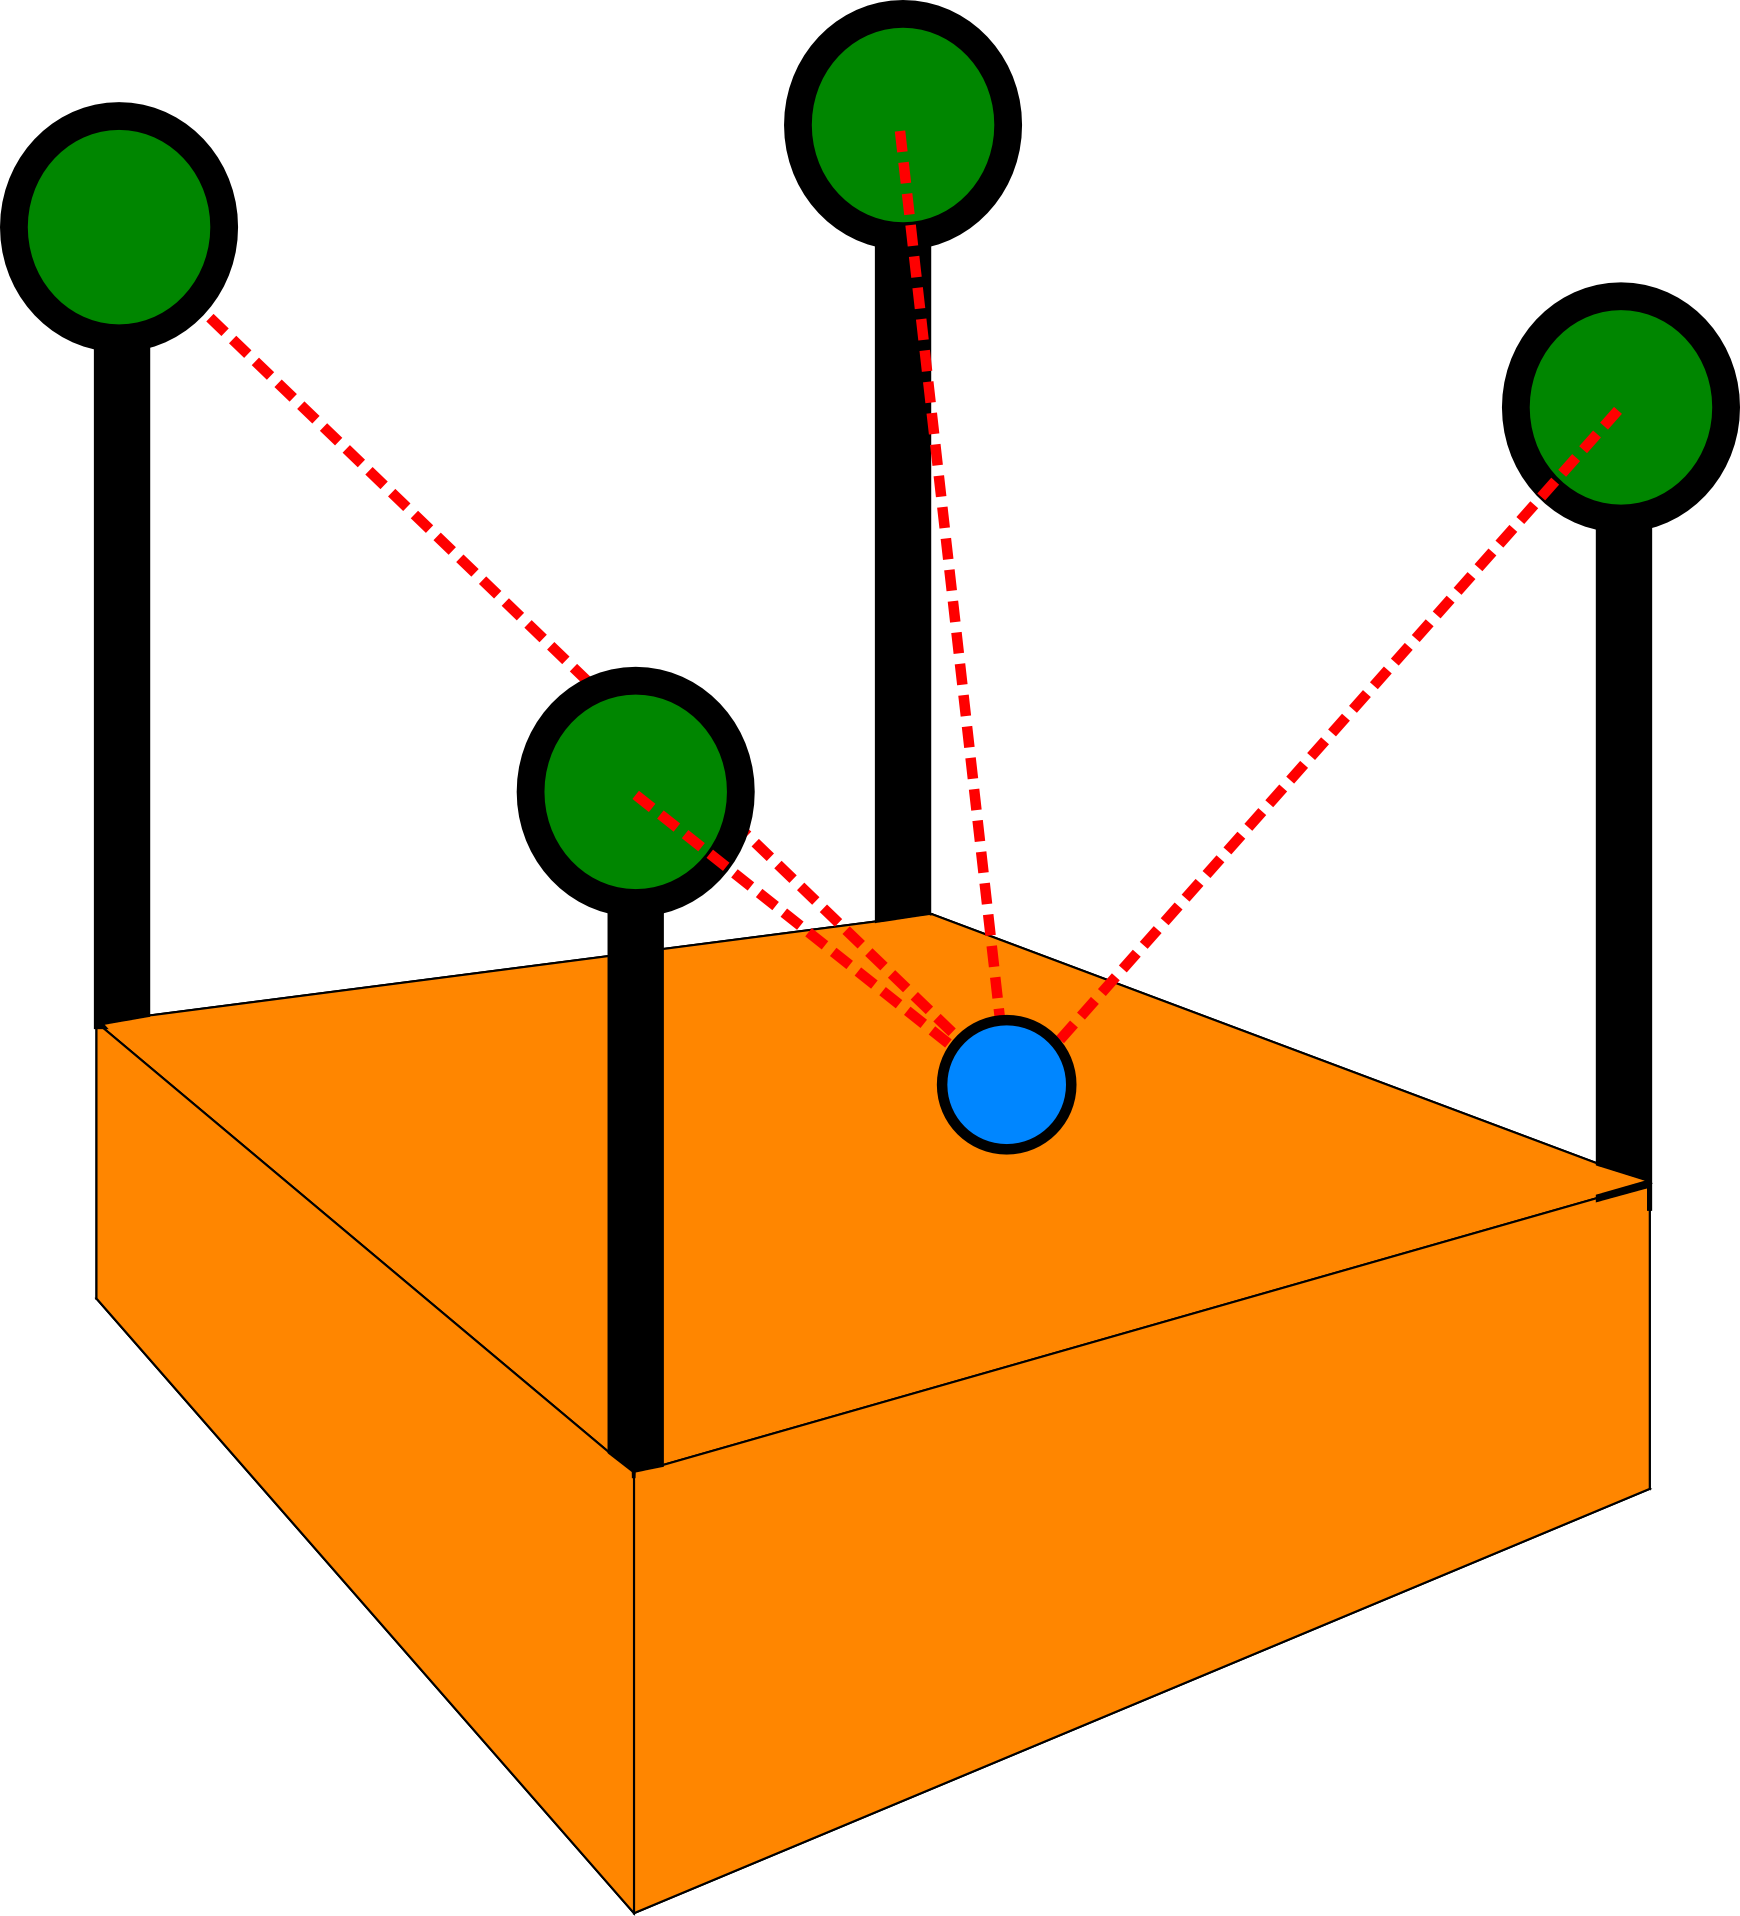

In [3]:
IPython.core.display.Image(r"images/scene001.png", width=640, embed=True)

Based on some physical characteristica of the signal, the robot is able to deduce it's distance to the center of each of the spheres (the length of the dotted red lines). Examples could be the signal strength of a WiFi signal, or the time an ultrasonic signal sent by each of the spheres took to be received by the robot. Here are some properties of the arena:

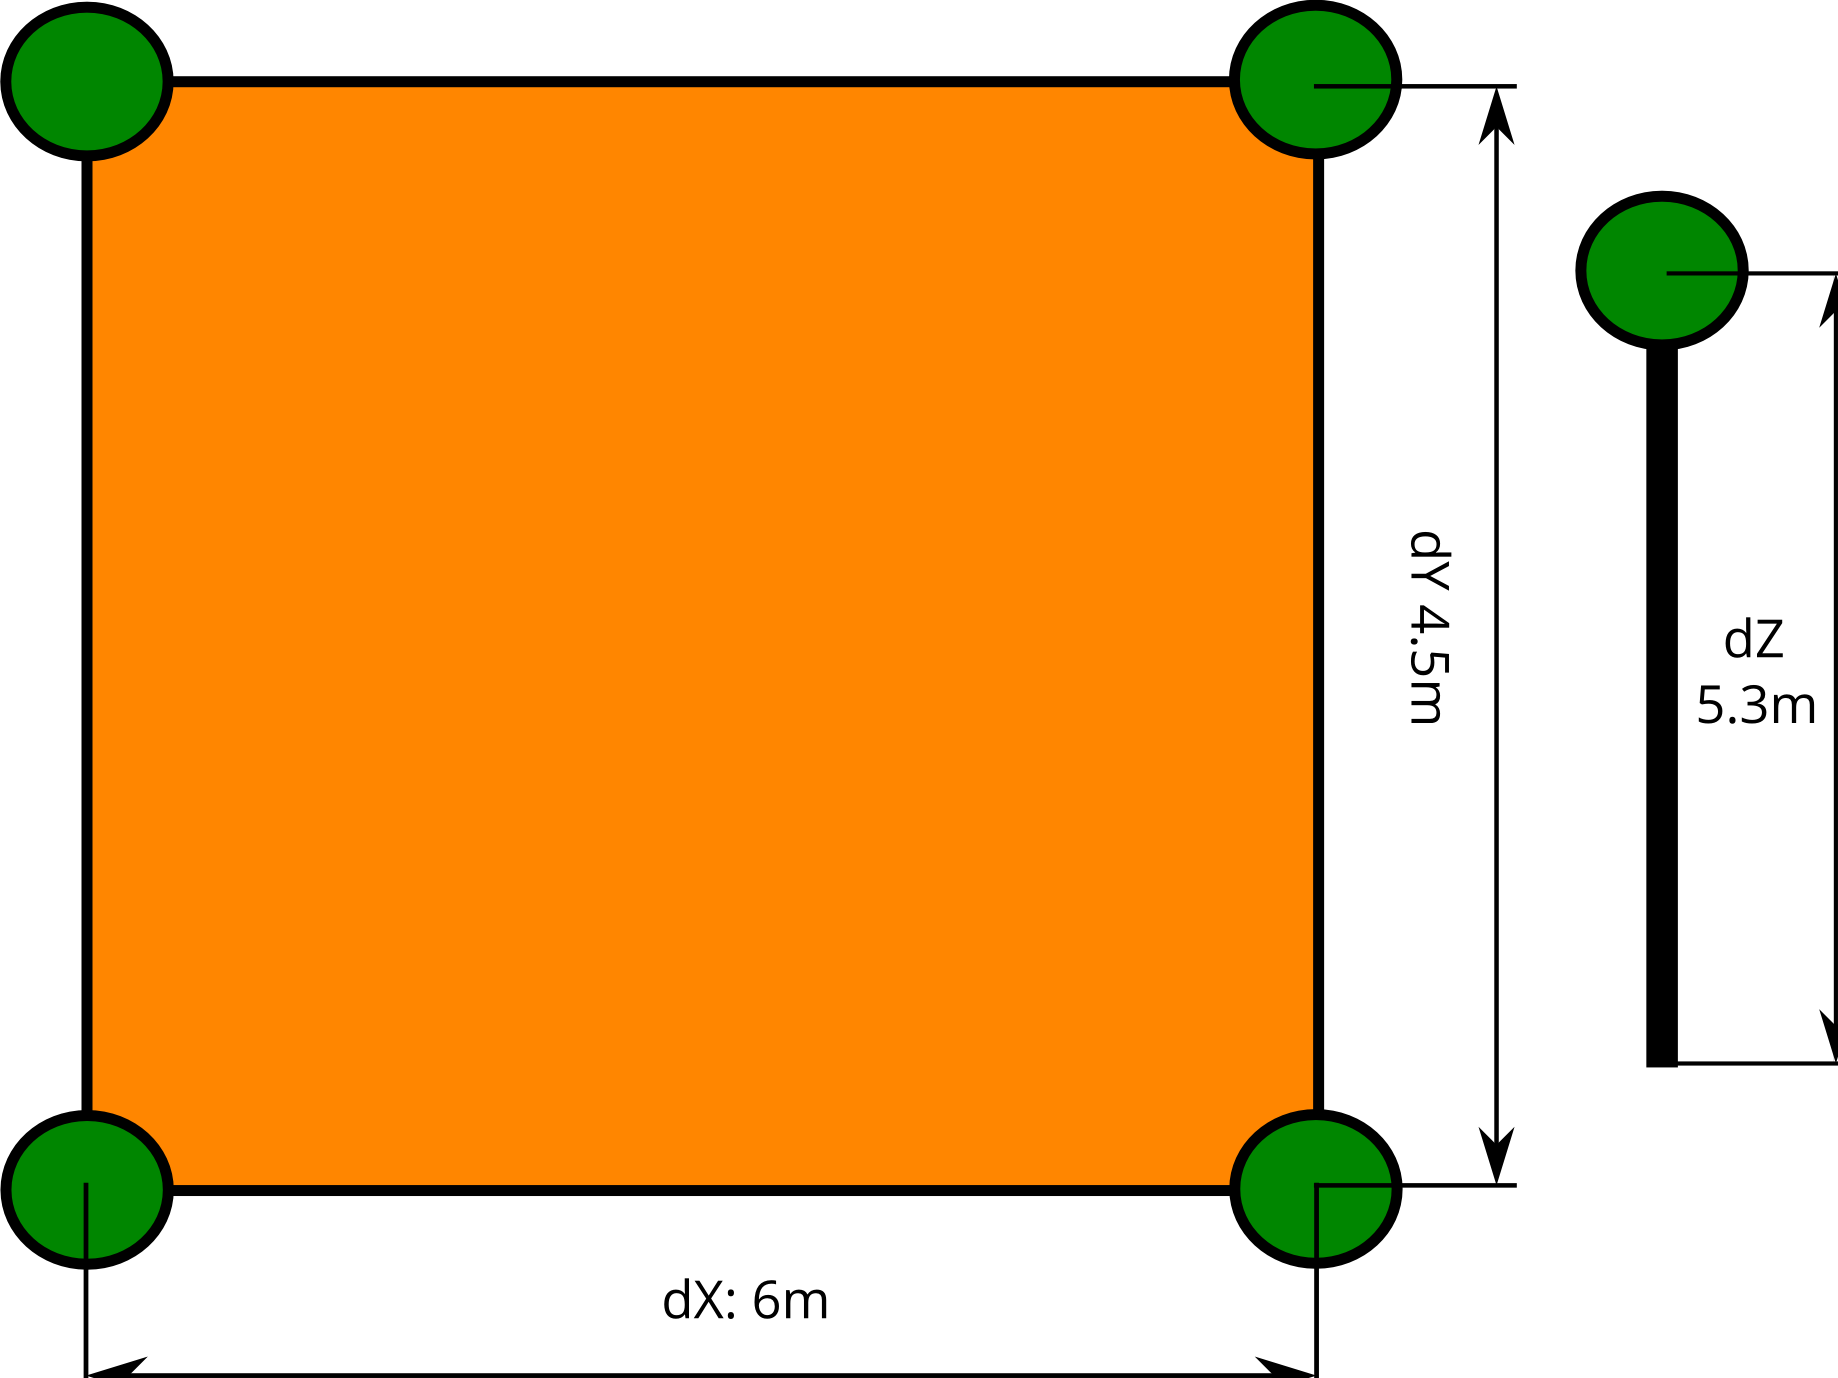

In [4]:
IPython.core.display.Image(r"images/g7142.png", width=640, embed=True)

The robot moves around in the arena, constantly receiving the distance to each of the spheres as a quadruple. Looking at the picture above, the elements of the tuple are returned in a counter-clockwise manner, i.e. the pillar in the lower left corner will be returned at the first position inside the tuple, the distance to the sphere on top of the pillar in the lower right corner will be at the second position of the tuple and so on. Now, one of your colleagues has written the framework for the robot and wants you to verify that it's working. She hands you a bunch of test data file **distances.npy** and asks you to determine the position of the robot while it is moving around the arena. 

* **Implement a method to determine the robot's position via the distance to each of the spheres.**
* **Write an update_position() method using the signature shown below. Do NOT modify the function's signature and comment in the assert before testing your implementation.**
* **Return the robot's position from the update_position method as an iterable containing the X, Y and Z position of the robot**
* **Assume that the position of the center of the sphere in the lower left corner is (0, 0, 0)**
* **Plot the positions of the robot in 3D or 2D view**

Remember what we discussed at the end of the last lab class, especially think of how a point that you only know the distance of can be located anywhere on the surface of a sphere whose radius equals said distance. Also remember that the position of each of the signal emitters (green spheres) is known. It might also help to think about how many of the four available signals you need in order to determine the position of the robot. Additionally, is there any "hidden" information available to you that imposes further constraints to the equations you are supposed to set up to determine the robot's position?

In [3]:
def update_position1(distances):
    
    sensor1 = np.array([0,0,5.3])
    sensor2 = np.array([6,0,5.3])
    sensor3 = np.array([6,4.5,5.3])
    sensor4 = np.array([0,4.5,5.3])
    sp.init_printing()
    x,y,z = sp.symbols('x,y,z')
    
    #figure = plt.figure()
    
    for i in range(len(distances)):
        radius = distances[i]
        
        r1 = radius[0]
        r2 = radius[1]
        r3 = radius[2]
        r4 = radius[3]
        
        equation = sp.solve([(x**2 + y**2 + ((z-5.3)**2) - r1**2),
                              (((x-6)**2) + y**2 + ((z-5.3)**2) - r2**2),
                             (((x-6)**2) + ((y-4.5)**2) + ((z-5.3)**2)-r3**2)],[x,y,z])
        result = equation[0]
        x_value = result[0]
        y_value = result[1]
        z_value = result[2]
        
        plt.scatter(x_value,y_value)
       

In [1]:
def update_position(distances):
    # Determine robot position
    # ...
    # <your code here>
    #position of sensors
    %matplotlib inline   
    import matplotlib.pyplot as plt
    from matplotlib import pyplot as plt
    
    import sympy as sp
    import numpy as np
    sp.init_printing()
    x, y, z = sp.symbols('x,y,z')
    sensor1 = np.array([0,0,0])
    sensor2 = np.array([6,0,0])
    sensor3 = np.array([6,4.5,0])
    sensor4 = np.array([0,4.5,0])
    A = np.array([sensor1,sensor2,sensor3])
    
    #Take values of r1,r2,r3 and r4 from distances file.
    fig = plt.figure()
    #compute values of x, y and z with the help of  standard equation.
    
    for i in range(len(distances)):
        radius = distances[i]
        #Take values of r1,r2,r3 and r4 from distances file.
        r1 = radius[0]
        r2 = radius[1]
        r3 = radius[2]
        r4 = radius[3]
        #print r1
        
        result = sp.solve([x**2 + y**2 + z**2-r1**2,
                           (x-6)**2 + y**2 + z**2 - r2**2,
                           (x-6)**2 + (y-4.5)**2 + z**2 - r3**2], [x,y,z])
        
        #taking positive values only
        position = result[0]
       
       
        x_value = position[0]
        y_value = position[1]
        z_value = position[2]
        #print x_value,y_value,r1
        #plot 2D
        plt.scatter(x_value,y_value)
        
        assert len(position) == 3
    #print result
    return position
    
    # ...
    # assert len(position) == 3
    # return position
    #raise NotImplementedError()

In [4]:
import sympy as sp
import numpy as np
distances = np.load("./distances.npy")

#update_position(distances)
update_position1(distances)

#print distances

NameError: global name 'plt' is not defined

In [8]:
from sympy import *
sensor1 = np.array([0,0,0])
sensor2 = np.array([6,0,0])
sensor3 = np.array([6,4.5,0])
sensor4 = np.array([0,4.5,0])
A = sp.Matrix([sensor1,sensor2,sensor3])
x,y,z = sp.symbols(("x","y","z"))
X = sp.Matrix([x,y,z]).reshape(3,1)
b = sp.Matrix([0.4,0.9,0.7886]).reshape(3,1)
print b.shape
#sp.solve([A,b],[X])


(3, 1)


### Jacobians

*This assignment will require some reading. Brace yourself. [Here](http://excelsior.cs.ucsb.edu/courses/cs290n_cg_modeling/notes/uiuc_notes/chap5.pdf) is a chapter which you may consider as an introduction to the topic.*

The following picture describes a robot arm with three rotational joints and two links:

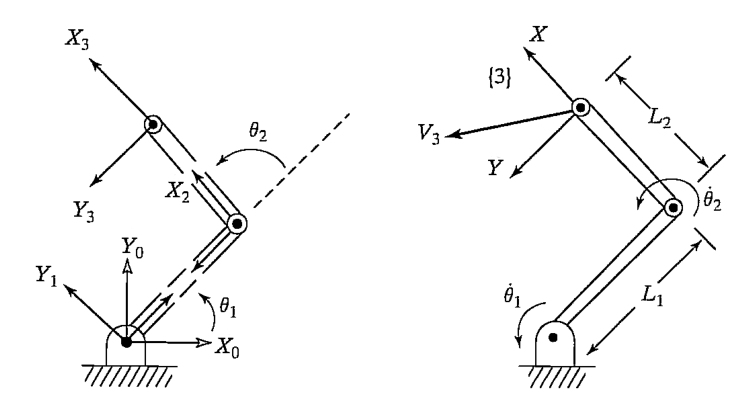

In [9]:
IPython.core.display.Image(r"images/robot_arm001.png")

The left part of the above figure shows four different frames attached to the arm of the robot, frame 0, 1, 2 and frame 3. $X_0$ and $Y_0$ describe the base frame, $Y_1$ is the unit vector pointing to the direction of the first link's $Y$ axis. Accordingly, $X_2$ denotes the direction of the second link's $X$ axis. Finally, $X_3$ and $Y_3$ specify the orientation of the end effector frame, which you can assume to be fixed.

1. **Specify the transformation matrices between frame 0 and frame 1, between frame 1 and frame 2 and finally the transformation from frame 2 to frame 3. Yes, this is a plain and simple repetition of what you learned in your very first lecture!**

Assuming angular velocities are expressed using a common frame, they can be added as vectors. Now, given link number $i$, it's velocity will be whatever the velocity of link $i-1$ was, plus whatever velocities were added by joint $i$. Another way to think of it is: before you can add the angular velocities, you have to transform one of the velocities to the coordinate frame of the other.

2. **Specify the term to compute the angular velocity $\omega_i$ in terms of $\omega_{i-1}$ with respect to frame $i-1$. Remember that angular velocity is the derivative of a joint value $\theta$ with respect to a rotation axis.**

3. **Specify the Jacobian matrix that relates the velocity of the end effector relative to the joint angles of the robotic arm!**

4. **Does the Jacobian have an inverse? If so, is the matrix *always* invertible? What is the physical meaning of the matrix inverse?**

5. **Does the Jacobian always have full rank? How does the rank of the Jacobian affect the velocity mapping?**

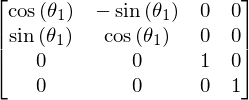

In [10]:
# Your solution
# Transformation Matrices between frame 0 and frame 1, between frame 1 and frame 2 and finally 
#from frame 2 to frame 3.
import sympy as sp
import numpy as np
sp.init_printing()
L1,L2, theta1, theta2 = sp.symbols(('L1,L2,theta1,theta2'))
#transformation between frame 0 to frame 1 
transform_frame1_frame0 = sp.Matrix([[sp.cos(theta1),-sp.sin(theta1),0,0],
                                     [sp.sin(theta1), sp.cos(theta1), 0, 0],
                                     [0,0,1,0],[0,0,0,1]])
transform_frame1_frame0

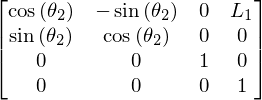

In [11]:
#Transform from frame 2 to frame 1
transform_frame2_frame1 = sp.Matrix([[sp.cos(theta2),-sp.sin(theta2),0,L1],
                                     [sp.sin(theta2), sp.cos(theta2), 0, 0],
                                     [0,0,1,0],[0,0,0,1]])
transform_frame2_frame1

---

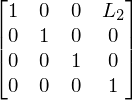

In [12]:
#Transform from frame 3 to frame 2
transform_frame3_frame2 = sp.Matrix([[1,0,0,L2],[0,1,0, 0],
                                     [0,0,1,0],[0,0,0,1]])
transform_frame3_frame2

1. **Specify the term to compute the angular velocity $\omega_i$ in terms of $\omega_{i-1}$ with respect to frame $i-1$. Remember that angular velocity is the derivative of a joint value $\theta$ with respect to a rotation axis.**

Let $\omega_i^{i-1}$ represent the angular velocity of link i that is imparted by the rotation of joint i, expressed relative to frame $(x_{i-1}, y_{i-1}, z_{i-1})$ .                                                      This angular velocity is expressed in the frame i-1 by:
            $$\omega_i^{i-1} = \dot{\theta}_{i-1}z_{i-1}  = \dot{\theta}_{i}k$$

**2.Specify the Jacobian matrix that relates the velocity of the end effector relative to the joint angles of the robotic arm!**

Jacobian is a transform matrix for velocity and it relates velocity of the end effector to the joint angles. End-effector position and orientation is denoted by x, and the set of joint angles is denoted by q.

Formally, a Jacobian is a set of partial differential equations:
   $$J = \frac{\partial x}{\partial q}$$
   
With a bit of manipulation we can get a neat result:
    $$J = \frac{\partial x}{\partial q}  \frac{\partial t}{\partial q} $$
    so :
    $$\frac{\partial x}{\partial t} = J   \frac{\partial q}{\partial t} $$
    or:
    $$\dot{x} = J\dot{q}$$
    
where $\dot{x}$ and $\dot{q}$ represent the time derivatives of x and q. This tells us that the end-effector velocity is equal to the Jacobian, J, multiplied by the joint angle velocity.

**3. Does the Jacobian have an inverse? If so, is the matrix *always* invertible? What is the physical meaning of the matrix inverse?**

yes, but it is not necessary that always jacobian have an inverse. If a matrix has  nonzero determinant and it is square then inverse of jacobian can be computed.But, if determinant of matrix is 0, then it is not invertible. Finding the inverse of a matrix is very important in many areas of science. In jacobian, it can be used to compute the co-ordinates of joint angles when co-ordinates of end-effector are given.

**4. Does the Jacobian always have full rank? How does the rank of the Jacobian affect the velocity mapping?**

No, jacobian does not always have full rank. If the determinant of matrix is 0, then jacobian do not have full rank. Since rank shows maximum number of linearly dependent elements in a matrix. If the rank of matrix is 0, it means that linear and angular velocity are not dependent to eachother, as jacobian is consists of linear and angular velocities.




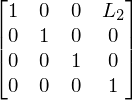

In [16]:
sp.init_printing()
import sympy as sp

L1,L2,theta1,theta2 = sp.symbols('L1,L2,theta1,theta2')
T_3_2 = sp.Matrix([[1,0,0,L2],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]])
T_3_2


In [17]:
T_2_1 = sp.Matrix([[sp.cos(theta2),-sp.sin(theta2),0,L1],
               [sp.sin(theta2),sp.cos(theta2),0,0],
               [0,0,1,0],
               [0,0,0,1]])

In [18]:
T_1_0 = sp.Matrix([[sp.cos(theta1),-sp.sin(theta1),0,0],
               [sp.sin(theta1),sp.cos(theta1),0,0],
               [0,0,1,0],
               [0,0,0,1]])

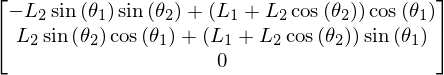

In [22]:
Trans = T_2_1 * T_3_2
Transform_3_0 = T_1_0 * Trans

#Extract translation part from Transformation 
translation_part = Transform_3_0[:3,3]
translation_part

(3, 2)


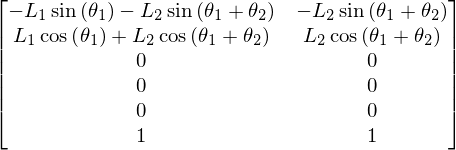

In [29]:
differentiate = sp.Matrix([[theta1,theta2]])
#differentiate.T.shape
J_linearvelocity = sp.simplify(translation_part.jacobian(differentiate.T))
print J_linearvelocity.shape
# the joints are rotating around the z axis, so the rotation part of our end-effector state is given by angular v
angular_velocity = sp.Matrix([0,0,theta1+theta2])
J_angular_velocity = angular_velocity.jacobian(differentiate)
Jacobian = J_linearvelocity.col_join(J_angular_velocity)
Jacobian